# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




#Del Signore, Vittoria, 95899998, vdelsignore@gmail.com

#### Se tiene un dataset con los datos de precios de frutas y verduras en el mercado central de Argentina. Los datos corresponden a 2017 y parte del 2018.  El interés del análisis es poder predecir precios en diferentes meses y buscar patrones de comportamiento de los precios en el tiempo o tendencias. En este caso, los datos son valores numéricos continuos, por lo tanto el modelo es de regresión lineal (aprendizaje supervisado).

_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [ ]:
#importamos todas las librerias que vamos a utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime  #para tener el formato de fecha necesario para el análisis

#librerias de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#creamos el dataset partiendo del archivo csv
df=pd.read_csv('/content/drive/MyDrive/precios-mercadocentral.csv',encoding='latin-1')


##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [ ]:
df.head()  #vemos los primeros 5 registros del dataset

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


In [ ]:
#creamos un diccionario para pasar los meses a valores numéricos
meses = {
    'Enero': '01', 'Febrero': '02','Marzo': '03', 'Abril':'04', 'Mayo':'05', 'Junio':'06', 'Julio':'07', 'Agosto':'08', 'Septiembre':'09', 'Octubre':'10', 'Noviembre':'11', 'Diciembre':'12'
}

In [ ]:
df['meses'] = df['mes'].map(meses)  #hacemos el mapeo con el diccionario meses creado en el paso anterior
df

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares,01
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares,01
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,01
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares,01
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares,01
...,...,...,...,...,...,...,...,...,...,...,...,...
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares,08
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares,08
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares,08
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares,08


In [ ]:
df['dia'] = '01'  #creamos una columna con el día 01, para que luego crear el formato fecha dd/mm/aaaa

In [ ]:
df.shape  #evaluamos cuantas filas y columnas tiene el dataset

(828, 13)

In [ ]:
df.info()   #vemos el tipo de cada variable y si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais_id        828 non-null    int64  
 1   pais           828 non-null    object 
 2   mercado        828 non-null    object 
 3   año            828 non-null    int64  
 4   mes            828 non-null    object 
 5   producto       828 non-null    object 
 6   variedad       828 non-null    object 
 7   origen         828 non-null    object 
 8   precio_usd_kg  767 non-null    float64
 9   moneda_cod     828 non-null    object 
 10  moneda         828 non-null    object 
 11  meses          828 non-null    object 
 12  dia            828 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 84.2+ KB


In [ ]:
df['año']=df['año'].astype('str')   #convertimos año a string
df['meses']=df['meses'].astype('str')   #convertimos meses a string

In [ ]:
df.describe().T   #vemos los principales datos estadísticos del dataset

,count,mean,std,min,25%,50%,75%,max
pais_id,828.0,32.00000,0.000000,32.0,32.00,32.00,32.00,32.00
precio_usd_kg,767.0,1.26236,1.437011,0.0,0.47,0.86,1.46,11.23


In [ ]:
df.columns   #vamos las variables involucradas en el dataset

Index(['pais_id', 'pais', 'mercado', 'año', 'mes', 'producto', 'variedad',
       'origen', 'precio_usd_kg', 'moneda_cod', 'moneda', 'meses', 'dia'],
      dtype='object')

In [ ]:
df.isnull().sum()   #evaluamos si hay valores nulos

pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
meses             0
dia               0
dtype: int64

In [ ]:
df.head(3)

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares,01,01
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares,01,01
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,01,01


####Hay valores nulos en el campo precio_usd_kg.  Estos datos pueden alterar nuestro análisis, por lo tanto se debe someter el dataset a limpieza

##3- Aplicar PROCESO DE LIMPIEZA

In [ ]:
df.shape   #se evalua la nueva dimensión del dataset, en donde hay 61 registros menos

(828, 15)

In [ ]:
#evaluación de valores estadísticos
promedio=df['precio_usd_kg'].mean()
mediana=df['precio_usd_kg'].median()
moda=df['precio_usd_kg'].mode()

print('el promedio del precio es: ', promedio)
print('la mediana del precio es: ', mediana)
print('la moda del precio es: ', moda)

el promedio del precio es:  1.2623598435462842
la mediana del precio es:  0.86
la moda del precio es:  0    0.41
1    0.42
Name: precio_usd_kg, dtype: float64


In [ ]:
#vemos los valores únicos de la columna producto
unique_list = list(set(df['producto']))
unique_list

['Palta',
 'Mandarina',
 'Brocoli',
 'Ajo',
 'Ciruela',
 'Cebolla',
 'Tomate',
 'Apio',
 'Melón',
 'Limón',
 'Chaucha',
 'Remolacha',
 'Anana',
 'Acelga',
 'Pimiento',
 'Berenjena',
 'Pera',
 'Papa',
 'Zapallito',
 'Frutilla',
 'Frambuesa',
 'Lechuga',
 'Cereza',
 'Naranja',
 'Uva',
 'Banana',
 'Albahaca',
 'Batata',
 'Manzana',
 'Kiwi',
 'Pepino',
 'Repollo',
 'Arveja',
 'Epinaca',
 'Zapallo',
 'Choclo',
 'Perejil',
 'Pomelo',
 'Durazno',
 'Radicheta',
 'PALTA',
 'Zanahoria']

In [ ]:
#concatenamos los datos de fecha, para tener el formato dd-mm-aaaa en un nuevo atributo llamado 'fecha'
df['añomes'] = df['año']+df['meses']
df.head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia,añomes,Nacional
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares,01,01,201701,Importado
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares,01,01,201701,Importado
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,01,01,201701,Nacional
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares,01,01,201701,Nacional
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares,01,01,201701,Nacional


In [ ]:
#creamos un diccionario para pasar los meses a valores numéricos
secuencia = {
    '201701': 1, '201702': 2, '201703': 3, '201704': 4, '201705': 5, '201706': 6, '201707': 7, '201708': 8, '201709': 9, '201710': 10, '201711': 11, '201712': 12, '201801': 13, '201802': 14,'201803': 15, '201804': 16, '201805': 17,
'201806': 18, '201807': 19, '201808': 20,}

In [ ]:
df['Secuencia_meses'] = df['añomes'].map(secuencia)  #hacemos el mapeo con el diccionario meses creado en el paso anterior
df

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia,añomes,Nacional,Secuencia_meses
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares,01,01,201701,Importado,1
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares,01,01,201701,Importado,1
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,01,01,201701,Nacional,1
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares,01,01,201701,Nacional,1
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares,01,01,201701,Nacional,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares,08,01,201808,Importado,20
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares,08,01,201808,Importado,20
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares,08,01,201808,Importado,20
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares,08,01,201808,Importado,20


In [ ]:
# #pasamos al formato fecha usando la librería to_datetime con el formato requerido por Python
# df_clean['Fecha'] = pd.to_datetime(df_clean['fecha'], format='%d-%m-%Y')
# df_clean.head()

In [ ]:
#crear una columna para saber si es nacional o importado
df['Nacional'] = ['Nacional' if s == 'Argentina' else 'Importado' for s in df['origen'] ]
df.head(3)

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia,añomes,Nacional,Secuencia_meses
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares,01,01,201701,Importado,1
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares,01,01,201701,Importado,1
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,01,01,201701,Nacional,1


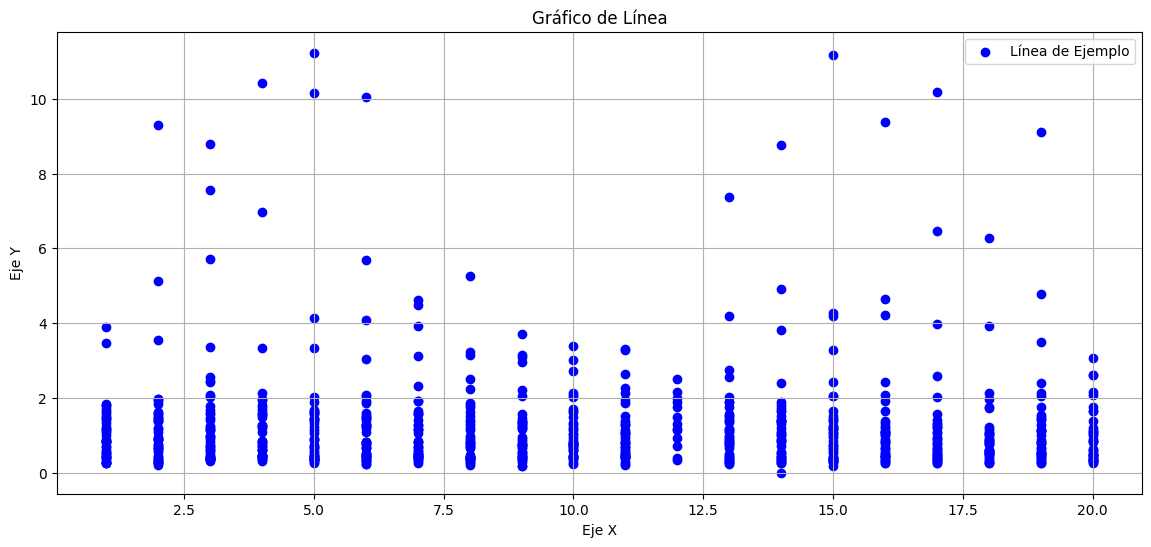

In [ ]:
#Graficamos los datos, usando como eje X la fecha y en eje Y el precio_usd_kg
plt.figure(figsize=(14, 6))  # Tamaño del gráfico (opcional)
plt.scatter(df.Secuencia_meses, df.precio_usd_kg, marker='o', color='b', label='Línea de Ejemplo')  # Crear la línea con círculos como marcadores
plt.title('Gráfico de Línea')  # Título del gráfico
plt.xlabel('Eje X')  # Etiqueta del eje x
plt.ylabel('Eje Y')  # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda (opcional, si proporcionaste un label en plt.plot)
plt.grid(True)  # Mostrar la cuadrícula de fondo (opcional)
plt.show()  # Mostrar el gráfico

####Vemos que hay una gran variedad de datos de distintos productos, donde cada uno tiene un comportamiento diferente y diferentes valores a lo largo de los meses evaluados. Por tal movito, es preferible hacer el análisis por producto.

In [ ]:
prod=input('seleccione un producto entre: Remolacha,Ajo,Manzana,Batata,Kiwi,\nTomate,PALTA,Frambuesa,Palta,Choclo,Brocoli,Zapallo,Repollo,Melón,Epinaca,Pepino,\nPomelo,Perejil,Pera,Berenjena,Lechuga,Mandarina,Frutilla,Limón,Arveja,Papa,\nApio,Pimiento,Zapallito,Durazno,Naranja,Zanahoria,Acelga,Radicheta,Banana,\nUva,Chaucha,Albahaca,Cebolla,Cereza,Anana,Ciruela')
print(prod)
filtro1=df['producto'] == prod

#ori=input('seleccione origen entre Nacional e Importado')
#print(ori)
#filtro2=df_clean['Nacional'] == ori
df_clean2=df[filtro1]
df_clean2.tail(3)


seleccione un producto entre: Remolacha,Ajo,Manzana,Batata,Kiwi,
Tomate,PALTA,Frambuesa,Palta,Choclo,Brocoli,Zapallo,Repollo,Melón,Epinaca,Pepino,
Pomelo,Perejil,Pera,Berenjena,Lechuga,Mandarina,Frutilla,Limón,Arveja,Papa,
Apio,Pimiento,Zapallito,Durazno,Naranja,Zanahoria,Acelga,Radicheta,Banana,
Uva,Chaucha,Albahaca,Cebolla,Cereza,Anana,CiruelaChoclo
Choclo


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia,añomes,Nacional,Secuencia_meses
736,32,Argentina,Mercado Central de Buenos Aires,2018,Junio,Choclo,s/especificar,s/especificar,0.85,USD,Dolares,06,01,201806,Importado,18
775,32,Argentina,Mercado Central de Buenos Aires,2018,Julio,Choclo,s/especificar,s/especificar,1.77,USD,Dolares,07,01,201807,Importado,19
814,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Choclo,s/especificar,s/especificar,1.66,USD,Dolares,08,01,201808,Importado,20


In [ ]:
df_clean2['precio_usd_kg'].fillna(df_clean2['precio_usd_kg'].mean(), inplace=True)

<ipython-input-149-cd62350033a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2['precio_usd_kg'].fillna(df_clean2['precio_usd_kg'].mean(), inplace=True)


In [ ]:
df_clean2.isnull().sum()  #en este punto se hace la limpieza de valores faltantes porque al aplicar promedio, varia para cada fruta o verdura seleccionada

pais_id            0
pais               0
mercado            0
año                0
mes                0
producto           0
variedad           0
origen             0
precio_usd_kg      0
moneda_cod         0
moneda             0
meses              0
dia                0
añomes             0
Nacional           0
Secuencia_meses    0
dtype: int64

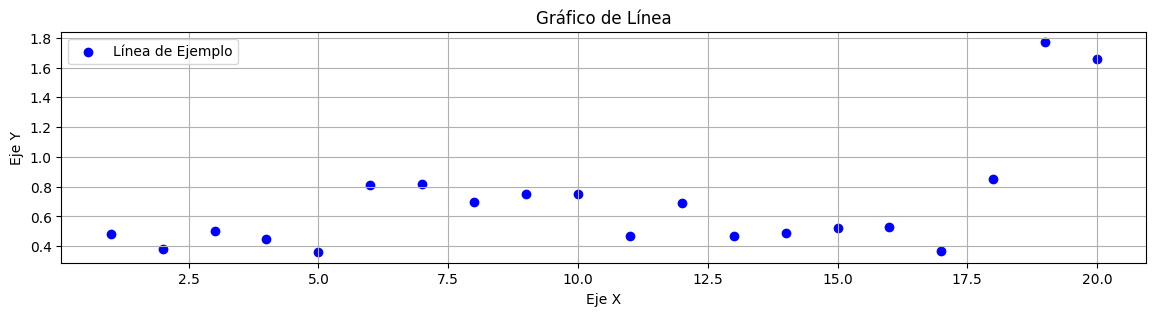

In [ ]:
plt.figure(figsize=(14, 3))  # Tamaño del gráfico (opcional)
plt.scatter(df_clean2.Secuencia_meses, df_clean2.precio_usd_kg, marker='o', color='b', label='Línea de Ejemplo')  # Crear la línea con círculos como marcadores
plt.title('Gráfico de Línea')  # Título del gráfico
plt.xlabel('Eje X')  # Etiqueta del eje x
plt.ylabel('Eje Y')  # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda (opcional, si proporcionaste un label en plt.plot)
plt.grid(True)  # Mostrar la cuadrícula de fondo (opcional)
plt.show()  # Mostrar el gráfico

In [ ]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 27 to 814
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais_id          20 non-null     int64  
 1   pais             20 non-null     object 
 2   mercado          20 non-null     object 
 3   año              20 non-null     object 
 4   mes              20 non-null     object 
 5   producto         20 non-null     object 
 6   variedad         20 non-null     object 
 7   origen           20 non-null     object 
 8   precio_usd_kg    20 non-null     float64
 9   moneda_cod       20 non-null     object 
 10  moneda           20 non-null     object 
 11  meses            20 non-null     object 
 12  dia              20 non-null     object 
 13  añomes           20 non-null     object 
 14  Nacional         20 non-null     object 
 15  Secuencia_meses  20 non-null     int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 2.7+ KB


##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [ ]:
# fecha_referencia = df_clean2['Fecha'].min()  # La fecha de referencia es la fecha más temprana en tus datos
# df_clean2['Dias'] = (df_clean2['Fecha'] - fecha_referencia).dt.days

In [ ]:
X= np.array(df_clean2['Secuencia_meses'])
y= np.array(df_clean2['precio_usd_kg'])

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X = X.reshape(-1, 1), y = y)

LinearRegression()

In [ ]:
y_pred = modelo.predict(X.reshape(-1,1))
y_pred

array([0.36531579, 0.39960388, 0.43389197, 0.46818006, 0.50246814,
       0.53675623, 0.57104432, 0.60533241, 0.6396205 , 0.67390859,
       0.70819668, 0.74248476, 0.77677285, 0.81106094, 0.84534903,
       0.87963712, 0.91392521, 0.9482133 , 0.98250139, 1.01678947])

In [ ]:
predicciones_lineales = modelo.predict(X_train.reshape(-1, 1))
predicciones_lineales

array([0.84534903, 0.53675623, 0.50246814, 0.36531579, 0.6396205 ,
       0.98250139, 0.9482133 , 0.74248476, 0.70819668, 0.67390859,
       0.60533241, 0.39960388, 1.01678947, 0.77677285, 0.57104432,
       0.87963712])

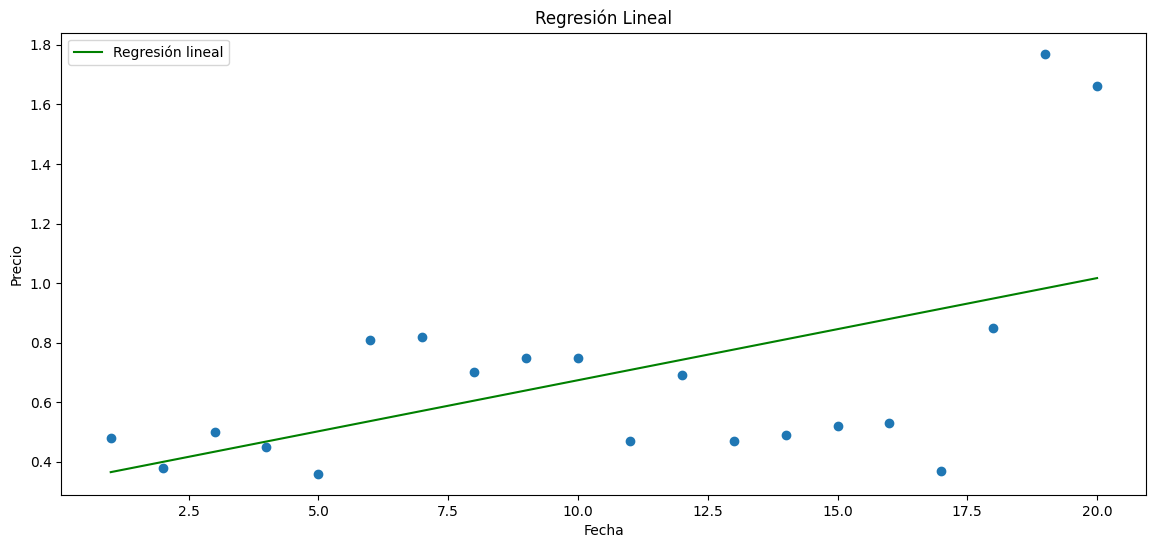

In [ ]:
plt.figure(figsize=(14, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='green', label='Regresión lineal')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.title('Regresión Lineal')
plt.show()

##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

In [ ]:
# Calcular la correlación
#correlacion = np.corrcoef(X.ravel(), y.ravel())[0, 1]

coeficientes=modelo.coef_

intercepto= modelo.intercept_

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y, y_pred)

# Imprimir resultados
#print(f"Coeficiente de Correlación: {correlacion:.2f}")
print(f"Coeficiente: {coeficientes}")
print(f"Intercepto: {intercepto:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Coeficiente: [0.03428809]
Intercepto: 0.33
Error Cuadrático Medio (MSE): 0.10
Coeficiente de Determinación (R²): 0.28


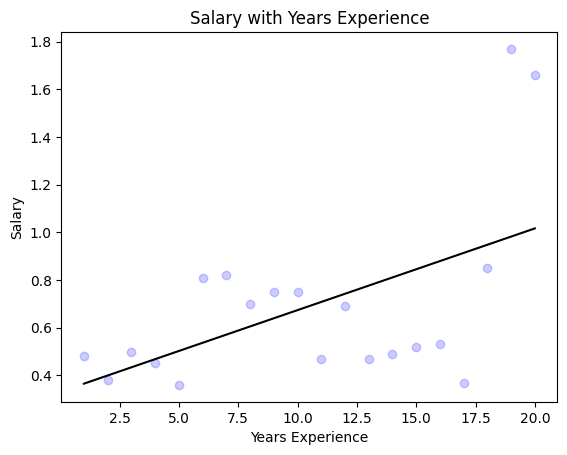

In [ ]:
plt.title("Salary with Years Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.scatter(X, y, alpha = 0.2, color="blue")
plt.plot(X, y_pred, color="black")
plt.show()

In [ ]:
df_clean2['Prediction'] = y_pred.round(1)
df_clean2['Residual'] = (y - y_pred).round(1)
df_clean2.head()

<ipython-input-159-a5b77002c003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2['Prediction'] = y_pred.round(1)
<ipython-input-159-a5b77002c003>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2['Residual'] = (y - y_pred).round(1)


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia,añomes,Nacional,Secuencia_meses,Prediction,Residual
27,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Choclo,Amarillo,Argentina,0.48,USD,Dolares,01,01,201701,Nacional,1,0.4,0.1
70,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Choclo,Amarillo,Argentina,0.38,USD,Dolares,02,01,201702,Nacional,2,0.4,-0.0
113,32,Argentina,Mercado Central de Buenos Aires,2017,Marzo,Choclo,Amarillo,Argentina,0.50,USD,Dolares,03,01,201703,Nacional,3,0.4,0.1
156,32,Argentina,Mercado Central de Buenos Aires,2017,Abril,Choclo,Amarillo,Argentina,0.45,USD,Dolares,04,01,201704,Nacional,4,0.5,-0.0
199,32,Argentina,Mercado Central de Buenos Aires,2017,Mayo,Choclo,Amarillo,Argentina,0.36,USD,Dolares,05,01,201705,Nacional,5,0.5,-0.1


##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

#### En esta base de datos hay muchas variables que pueden influir, como por ejemplo el producto y la procedencia, por eso se aplicaron filtros donde el usuario puede seleccionar producto y si es nacional o importado; así al menos los datos guardan más relación entre sí, pues no tendría mucho sentido comparar precio de frutilla Argentina con Bananas Importadas.
#### Se aplicó la regresión lineal, aunque los resultados varian según el producto y origen seleccionado, pero con el r2 al probar con varios productos, se puede apreciar que la correlación es baja. Esto puede deberse a factores como la estacionalidad, ya que hay productos que de acuerdo a su estación presentan mayor oferta y puede afectar la demanda.  Esta estacionalidad lleva a tener mucha variabilidad en los precios, por lo que pudiera ser buena idea suavizar la curva de los datos, aplicando medias móviles u otro procedimiento. Otra idea puede ser recolectar más datos, por varios meses para poder entender bien el comportamiento de los precios.
#### Hay otros factores que se escapan del análisis como: inflación de precios, problemas logísticos que se trasladan a los precios, problemas propios de cada rubro, cambios climaticos y su efecto en el precio dependiente del origen de la fruta o verdura, etc.
#### Se pueden aplicar otros modelos, como una regresión logística donde 1 sea productos con precios elevados y 0 para productos económicos, y luego predecir si para un producto su precio será elevado o bajo.

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


Los modelos K-means, Arbol de decisión y KNN se usan para clasificar. En este dataset podemos clasificar si los productos tendrán un precio alto o bajo. Para definir si un precio es alto o bajo, vamos a tomar el promedio simple como el valor medio y los valores por encima del promedio serían "precios altos" y los que estén por debajo serán "precios bajos".  Y con esa columna usaremos alguno de estos modelos de aprendizaje no supervisado.

In [ ]:
promedio=df_clean2['precio_usd_kg'].mean()
promedio

0.6910526315789473

In [ ]:
#crear una columna para saber si es precio alto o bajo
df_clean2['valor_precio'] = ['alto' if m >= promedio else 'bajo' for m in df_clean2['precio_usd_kg'] ]
df_clean2.head(3)

<ipython-input-161-56af97ac457e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2['valor_precio'] = ['alto' if m >= promedio else 'bajo' for m in df_clean2['precio_usd_kg'] ]


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,meses,dia,añomes,Nacional,Secuencia_meses,Prediction,Residual,valor_precio
27,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Choclo,Amarillo,Argentina,0.48,USD,Dolares,01,01,201701,Nacional,1,0.4,0.1,bajo
70,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Choclo,Amarillo,Argentina,0.38,USD,Dolares,02,01,201702,Nacional,2,0.4,-0.0,bajo
113,32,Argentina,Mercado Central de Buenos Aires,2017,Marzo,Choclo,Amarillo,Argentina,0.50,USD,Dolares,03,01,201703,Nacional,3,0.4,0.1,bajo


In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
X= np.array(df_clean2['añomes'])
y= np.array(df_clean2['valor_precio'])

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
clf.fit(X_train.reshape(-1,1), y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predicciones = clf.predict(X_test.reshape(-1,1))
predicciones

array(['bajo', 'bajo', 'bajo', 'bajo'], dtype=object)

In [ ]:
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)

Precisión del modelo: 1.0


In [ ]:
matriz = confusion_matrix(y_test, predicciones)
matriz


array([[4]])

In [ ]:
recall = recall_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones)

print('recall: ',recall)
print('f1: ',f1)

recall:  0.0
f1:  0.0


/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

El segundo modelo donde se aplicó el árbol de decisión para saber si el producto iba a ser de precio alto o de precio bajo, generó una precisión de 1.0. Sin embargo, su f1, y recall fueron 0.